# Noise Reduction in Audio Signals Using Short Time Fourier Transforms

## Background 

Digital Signal Processing (DSP) is a technology used to manipulate and analyze signals, such as audio, in order to improve their quality or extract useful information. One DSP technique commonly used for noise reduction in audio signals is the Short Time Fourier Transform (STFT).

The STFT is a method for analyzing a signal in the frequency domain, by dividing the signal into small, overlapping segments and computing the Fourier Transform (FT) of each segment. The result is a sequence of spectrograms, which display the frequency content of the signal at each point in time.

One of the key advantages of the STFT is that it can effectively separate a signal into its individual frequency components, making it easier to identify and remove unwanted noise. This is done by applying a window function to each segment of the signal, which helps to isolate the frequency content of the signal within a specific time frame.

Once the spectrograms have been calculated, various noise reduction techniques can be applied. For example, a thresholding technique can be used to eliminate frequency components that are below a certain level, or a filtering technique can be used to remove specific frequency bands.

Another technique that can be applied is the Wiener filter which is a technique that use the statistical properties of the signal and noise to estimate the original clean signal.

Overall, the STFT is a powerful tool for noise reduction in audio signals, as it allows for precise control over the frequency content of the signal, making it possible to effectively remove unwanted noise while preserving the quality of the original signal.


### Statement of Problem

Noise is a common problem in audio recordings, as unwanted sound can interfere and even distort the intended sound. Reducing noise in audio signals is a challenge due to the number of frequencies present in a signal and the complexity of the sounds. To address this problem, this project aims to use short time Fourier transforms to reduce noise in audio signals. This will be done by firstly inspecting the audio signal and applying an analysis to identify sources of noise. Once identified, Fourier techniques can be used to eliminate elements of the signal that are considered to be noise, thereby producing a cleaner and clearer sounding signal.

## Objective

### General Objective:
The general objective of this project is to develop a method to reduce noise in audio signals using short time Fourier Transforms. 

### Specific Objectives:
1. Investigate the most commonly used techniques and parameters for noise reduction in audio signals. 
2. Evaluate and assess the performance of each technique and parameter under various conditions.
3. Design and develop an algorithm for noise reduction in audio signals using short time Fourier Transforms.
4. Validate the developed algorithm in terms of performance and accuracy.
5. Implement the algorithm in an application that allows users to reduce noise in audio signals easily.

## Methodology 

The methodology for this project will involve the use of both theoretical analysis and practical implementation to demonstrate the effectiveness of the STFT for noise reduction in audio signals. The methdology for this project can be broken down into the following steps:

1. **Data collection**: The first step is to collect a dataset of audio signals that contain noise. This dataset can be obtained by recording audio in a noisy environment or by artificially adding noise to clean audio signals.

2. **Pre-processing**: The next step is to pre-process the collected audio signals. This includes removing any unwanted sections of the audio, such as silence, and normalizing the audio to a consistent level.

3. **Analysis**: The pre-processed audio signals are then analyzed using the STFT. The STFT decomposes the audio signals into a series of frequency components, which can be used to identify and isolate the noise.

4. **Noise reduction**: Once the noise has been identified and isolated, it can be reduced or removed using various techniques. These include filtering, subtraction, and masking.

5. **Post-processing**: The final step is to post-process the audio signals to ensure that they are of high quality and ready for use. This includes applying any necessary gain adjustments and removing any remaining noise.

6. **Evaluation**: To evaluate the performance of the noise reduction technique, a subjective listening test can be conducted or an objective evaluation metric like SNR can be used.

7. **Optimization**: Based on the results of the evaluation, the noise reduction technique can be optimized by adjusting the parameters or trying different techniques.

## Simulation

#### Step 1: Import the necessary libraries


In [1]:
import wave
import numpy as np
from plot_timefreq import plot_tf, multi_plot_tf 
import matplotlib.pyplot as plt
import IPython 
#from scipy.io import wavfile
from scipy import signal
%matplotlib inline

#### Step 2: Load the audio file,  extract the samples , and  add white noise

The following code uses the wave module to open the audio file, and the numpy module to convert the bytes of audio data into a numpy array. The resulting array, samples, contains the individual samples of the audio file. You need to install wave and numpy modules in your environment if you don't have them.
You can use pip install wave and pip install numpy to install them.

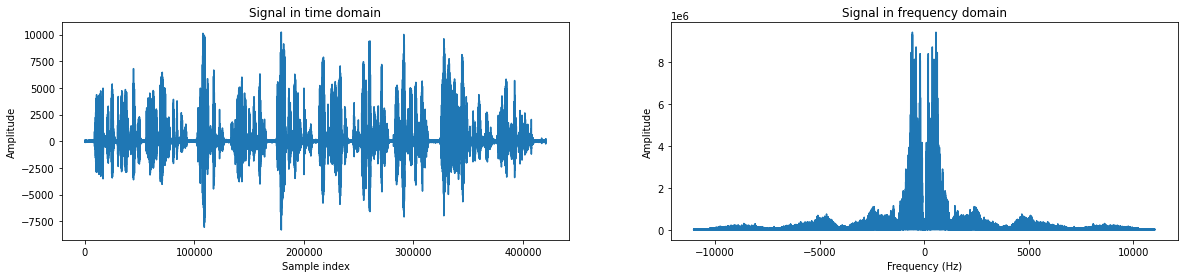

In [2]:
# Open the audio file
audio_file = wave.open("preamble.wav", "r")
# Get the number of frames and the sample rate
num_frames = audio_file.getnframes()
sample_rate = audio_file.getframerate()
# Read the frames as bytes
audio_data = audio_file.readframes(num_frames)
# Convert the bytes to a numpy array
samples = np.frombuffer(audio_data, np.int16)
# Close the audio file
audio_file.close()

# plot in time and frequeny domain
plot_tf(samples,sample_rate)
#lesten the audio signal 
IPython.display.Audio(data=samples, rate=sample_rate)


[-1.89504948 -1.59411472 -0.17102965 ...  0.92171902 -0.6068468
 -1.15896198]


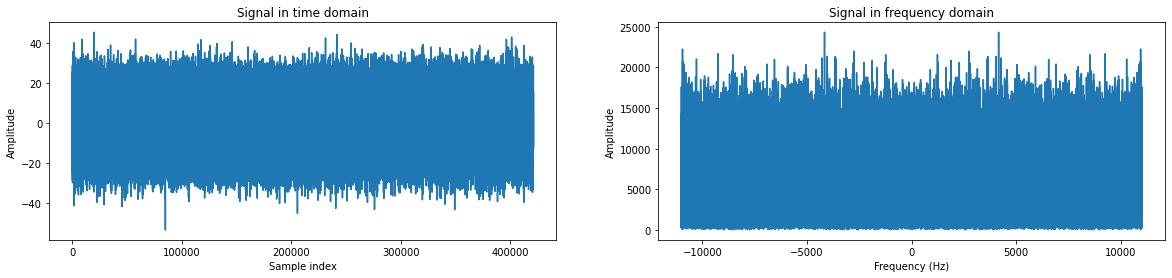

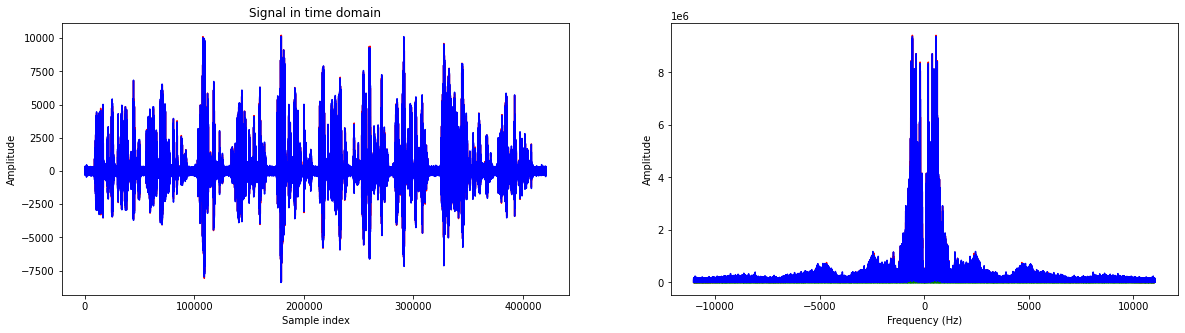

In [3]:
# Adding white and background noise to orginal signal 

# Generate White noise 
noise = np.random.randn(len(samples))
print(noise)
noise_level = 10
white_noise = noise_level * noise
# Generate background noise (Gaussian)
background_noise = np.random.normal(0,  0.05, len(samples))
total_noise = background_noise + white_noise
# add to orginal signal

nosiy_sample = 10*total_noise + samples
# plot in time and frequeny domain
plot_tf(total_noise,sample_rate)
multi_plot_tf([samples,total_noise, nosiy_sample],sample_rate)
#lesten the audio signal 
IPython.display.Audio(data=nosiy_sample, rate=sample_rate)

#### Step 3: Prerpocessing

The next step is to pre-process the collected audio signals. This includes removing any unwanted sections of the audio, such as silence, and normalizing the audio to a consistent level.


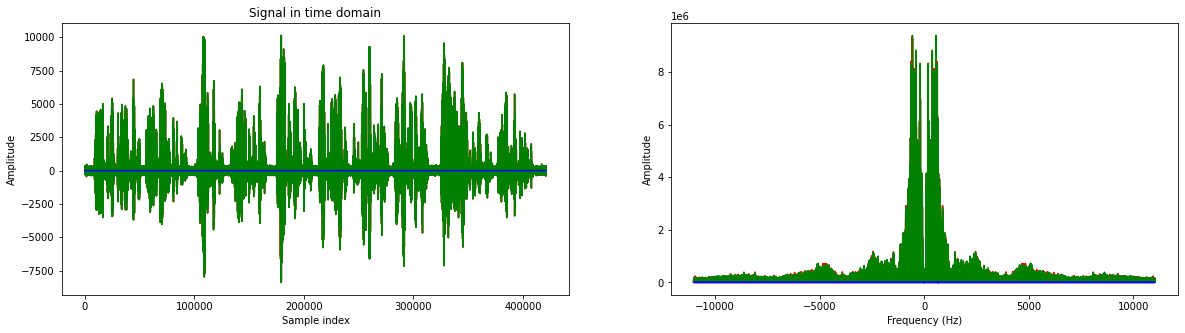

In [9]:
# Detect silence threshold
threshold = 0.005
# Find silent periods in signal
silence = np.where(abs(nosiy_sample) < threshold)
# Delete silent periods in signal
x_no_silence = np.delete(nosiy_sample, silence)
# Normalize signal
x_norm = x_no_silence / max(abs(x_no_silence))

# plot in time and frequeny domain
multi_plot_tf([nosiy_sample,x_no_silence, x_norm],sample_rate)
#lesten the audio signal 
IPython.display.Audio(data=x_norm, rate=sample_rate)

**Step 4: Analysis**

The pre-processed audio signals are then analyzed using the STFT. The STFT decomposes the audio signals into a series of frequency components, which can be used to identify and isolate the noise.


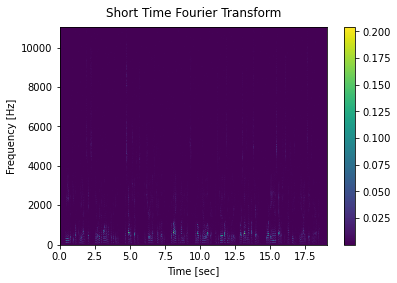

In [8]:
# Define the window and the hop size for the STFT
window = signal.windows.hann(1024)
# Perform the STFT
f, t, Zxx = signal.stft(x_norm, sample_rate, window=window, nperseg=1024, noverlap=512)
#f, t, Zxx = signal.stft(x_norm, sample_rate)
plt.pcolormesh(t, f, np.abs(Zxx))
plt.title("Short Time Fourier Transform",x=0.5, y=1.02)
plt.colorbar()
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.show()

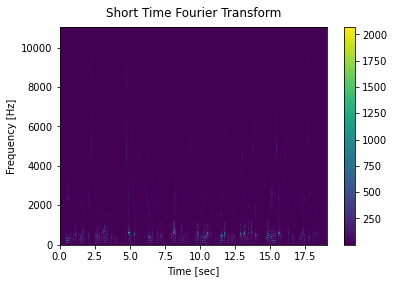

In [6]:
# Define the window and the hop size for the STFT
window = signal.windows.hann(1024)
# Perform the STFT
f, t, Zxx = signal.stft(samples, sample_rate, window=window, nperseg=1024, noverlap=512)
#f, t, Zxx = signal.stft(x_norm, sample_rate)
plt.pcolormesh(t, f, np.abs(Zxx))
plt.title("Short Time Fourier Transform",x=0.5, y=1.02)
plt.colorbar()
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.show()

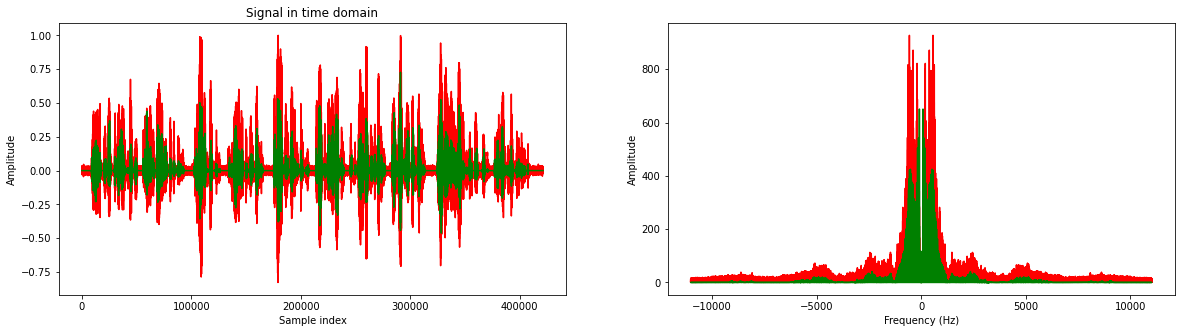

In [10]:
# Apply a threshold to the magnitude of the STFT coefficients to remove noise
Zxx_magnitude = np.abs(Zxx)
threshold = np.mean(Zxx_magnitude) + 2*np.std(Zxx_magnitude)
Zxx_magnitude[Zxx_magnitude < threshold] = 0

# Reconstruct the audio signal from the modified STFT coefficients
_, audio_clean = signal.istft(Zxx_magnitude, sample_rate, window=window, nperseg=1024, noverlap=512)
#_, audio_clean = signal.istft(Zxx_magnitude, sample_rate)

multi_plot_tf([ x_norm, audio_clean],sample_rate)
#lesten the audio signal 
IPython.display.Audio(data=audio_clean, rate=sample_rate)